In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
!tar xf spark-3.5.5-bin-hadoop3.tgz
!pip install -q findspark
!pip install -q pyspark==3.5.5
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.5.5-bin-hadoop3'

In [7]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
media = 0
desvio_padrao=0.1
pd_temporario = pd.DataFrame(np.random.normal(media,desvio_padrao,10000), columns=['a'])
spark_temporario = spark.createDataFrame(pd_temporario)
spark_temporario.createOrReplaceTempView('nova_tabela_temporaria')
query = 'SELECT COUNT(a) FROM nova_tabela_temporaria WHERE a<0.1 and a>-0.1'
sql_final = spark.sql(query)
pd_final = sql_final.toPandas()
pd_final

,count(a)
0,6858


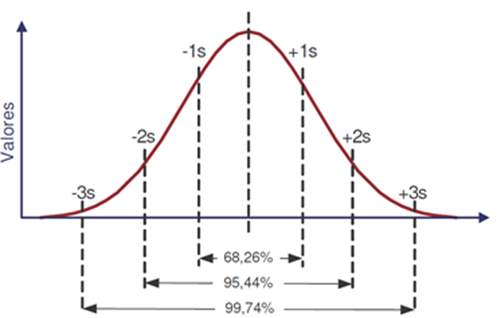 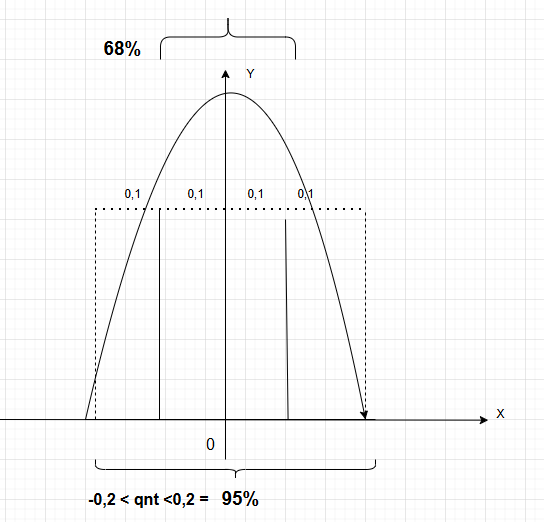